In [3]:
import random


class Individual:

    def __init__(self, name) -> None:
        self.name = name
        self.fitness = random.randint(0, 10)

    def __str__(self):
        return f'{self.name}: {self.fitness}'

    def __repr__(self):
        return str(self)

    @classmethod
    def create_random_population(cls, num):
        population = []
        for i in range(97, 97 + num):
            population.append(Individual(chr(i).upper()))
        return population

In [2]:
import random

def selection_tournament(individuals, group_size = 2):
    selected = []
    for _ in range(len(individuals)):
        candidates = [random.choice(individuals) for _ in range(group_size)]
        selected.append(max(candidates, key = lambda ind: ind.fitness))
    return selected

In [22]:
import random

def selection_proportional(individuals):
    sorted_individuals = sorted(individuals, key = lambda ind: ind.fitness, reverse = True)
    print(sorted_individuals)
    fitness_sum = sum([ind.fitness for ind in individuals])
    selected = []

    for _ in range(len(sorted_individuals)):
        shave = random.random() * fitness_sum
        roulette_sum = 0
        for ind in sorted_individuals:
            roulette_sum += ind.fitness
            if roulette_sum > shave:
                selected.append(ind)
                break

    return selected

In [23]:
POPULATION_SIZE = 5
random.seed(4)

population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_proportional(population)

print(f"Population: {population}")
print(f"Selected: {selected}")


[E: 7, D: 6, B: 4, A: 3, C: 1]
Population: [A: 3, B: 4, C: 1, D: 6, E: 7]
Selected: [E: 7, E: 7, D: 6, A: 3, B: 4]


In [16]:
POPULATION_SIZE = 5
random.seed(4)

population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_proportional(population)

print(f"Population: {population}")
print(f"Selected: {selected}")

[E: 7, D: 6, B: 4, A: 3, C: 1]
21
3.2544176868506156
1.396817009271388
8.433411304186572
19.277055904842097
16.809499381411978
Population: [A: 3, B: 4, C: 1, D: 6, E: 7]
Selected: [E: 7, E: 7, D: 6, A: 3, B: 4]


In [4]:
import random


def selection_stochastic_universal_sampling(individuals):
    sorted_individuals = sorted(individuals, key = lambda ind: ind.fitness, reverse = True)
    fitness_sum = sum([ind.fitness for ind in individuals])

    distance = fitness_sum / len(individuals)
    shift = random.uniform(0, distance)
    borders = [shift + i * distance for i in range(len(individuals))]

    selected = []
    for border in borders:
        i = 0
        roulette_sum = sorted_individuals[i].fitness
        while roulette_sum < border:
            i += 1
            roulette_sum += sorted_individuals[i].fitness
        selected.append(sorted_individuals[i])

    return selected

In [5]:
import random


def selection_rank(individuals):
    sorted_individuals = sorted(individuals, key = lambda ind: ind.fitness, reverse = True)
    rank_distance = 1 / len(individuals)
    ranks = [(1 - i * rank_distance) for i in range(len(individuals))]
    ranks_sum = sum(ranks)
    selected = []

    for _ in range(len(sorted_individuals)):
        shave = random.random() * ranks_sum
        rank_sum = 0
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]
            if rank_sum > shave:
                selected.append(sorted_individuals[i])
                break

    return selected


In [6]:
import random

def selection_rank_with_elite(individuals, elite_size = 0):
    sorted_individuals = sorted(individuals, key = lambda ind: ind.fitness, reverse = True)
    rank_distance = 1 / len(individuals)
    ranks = [(1 - i * rank_distance) for i in range(len(individuals))]
    ranks_sum = sum(ranks)
    selected = sorted_individuals[0:elite_size]

    for i in range(len(sorted_individuals) - elite_size):
        shave = random.random() * ranks_sum
        rank_sum = 0
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]
            if rank_sum > shave:
                selected.append(sorted_individuals[i])
                break

    return selected

In [7]:
POPULATION_SIZE = 5
random.seed(4)

population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_proportional(population)

print(f"Population: {population}")
print(f"Selected: {selected}")


Population: [A: 3, B: 4, C: 1, D: 6, E: 7]
Selected: [E: 7, E: 7, D: 6, A: 3, B: 4]


In [8]:
POPULATION_SIZE = 5
random.seed(18)

population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_rank(population)

print(f'Population: {population}')
print(f'Selected: {selected}')


Population: [A: 2, B: 1, C: 10, D: 7, E: 5]
Selected: [C: 10, B: 1, E: 5, C: 10, C: 10]


In [9]:
POPULATION_SIZE = 5
random.seed(3)

population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_rank_with_elite(population, elite_size = 2)

print(f"Population: {population}")
print(f"Population: {selected}")

Population: [A: 3, B: 9, C: 8, D: 2, E: 5]
Population: [B: 9, C: 8, A: 3, C: 8, C: 8]


In [10]:
POPULATION_SIZE = 5
random.seed(4)

population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_stochastic_universal_sampling(population)

print("Population:")
[print(ind) for ind in population]

print("Selected:")
[print(ind) for ind in selected]

Population:
A: 3
B: 4
C: 1
D: 6
E: 7
Selected:
E: 7
E: 7
D: 6
B: 4
A: 3


[None, None, None, None, None]

In [11]:
POPULATION_SIZE = 5
random.seed(4)

population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_tournament(population, group_size = 3)

print(f"Population: {population}")
print(f"Selected: {selected}")

Population: [A: 3, B: 4, C: 1, D: 6, E: 7]
Selected: [B: 4, E: 7, B: 4, E: 7, B: 4]


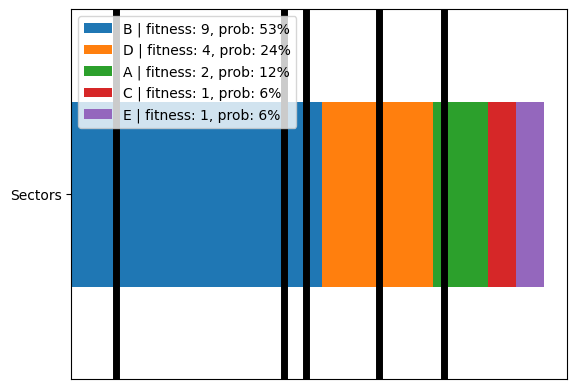

In [12]:
import random
import pandas as pd
import matplotlib.pyplot as plt
# from ch3.individual import Individual

POPULATION_SIZE = 5
random.seed(1)

unsorted_population = Individual.create_random_population(POPULATION_SIZE)
population = sorted(unsorted_population, key = lambda ind: ind.fitness, reverse = True)
fitness_sum = sum([ind.fitness for ind in population])
fitness_map = {}
for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'
    fitness_map[i_label] = i.fitness

index = ['Sectors']
df = pd.DataFrame(fitness_map, index = index)
df.plot.barh(stacked = True)
for _ in range(POPULATION_SIZE):
    plt.axvline(x = random.random() * fitness_sum, linewidth = 5, color = 'black')
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.show()

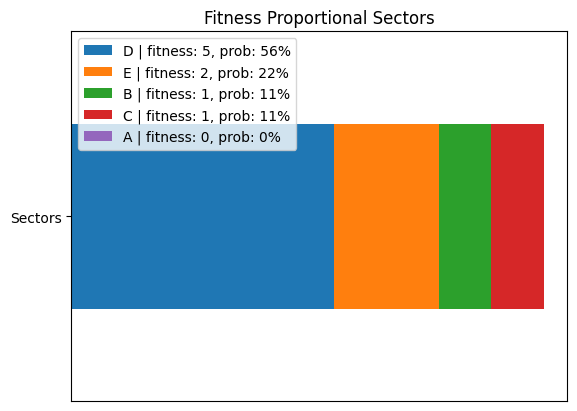

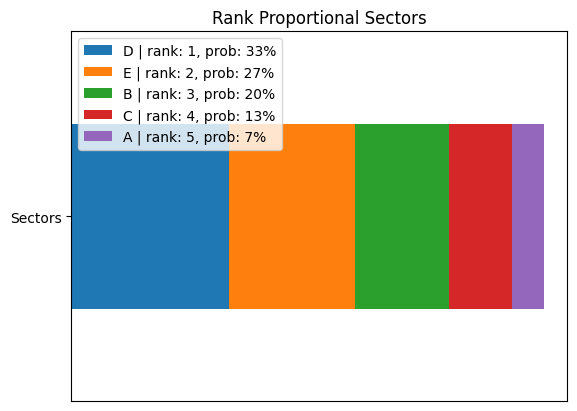

In [13]:
import random
import pandas as pd
import matplotlib.pyplot as plt
#from ch3.individual import Individual

POPULATION_SIZE = 5
random.seed(2)

unsorted_population = Individual.create_random_population(POPULATION_SIZE)
population = sorted(unsorted_population, key = lambda ind: ind.fitness, reverse = True)

fitness_sum = sum([ind.fitness for ind in population])
fitness_map = {}
for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'
    fitness_map[i_label] = i.fitness

proportional_df = pd.DataFrame(fitness_map, index = ['Sectors'])
proportional_df.plot.barh(stacked = True)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Fitness Proportional Sectors')
plt.show()

rank_step = 1 / POPULATION_SIZE
rank_sum = sum([1 - rank_step * i for i in range(len(population))])
rank_map = {}
for i in range(len(population)):
    i_rank = i + 1
    i_rank_proportion = 1 - i * rank_step
    i_prob = round(100 * i_rank_proportion / rank_sum)
    i_label = f'{population[i].name} | rank: {i_rank}, prob: {i_prob}%'
    rank_map[i_label] = i_rank_proportion

rank_df = pd.DataFrame(rank_map, index = ['Sectors'])
rank_df.plot.barh(stacked = True)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.title('Rank Proportional Sectors')
plt.show()


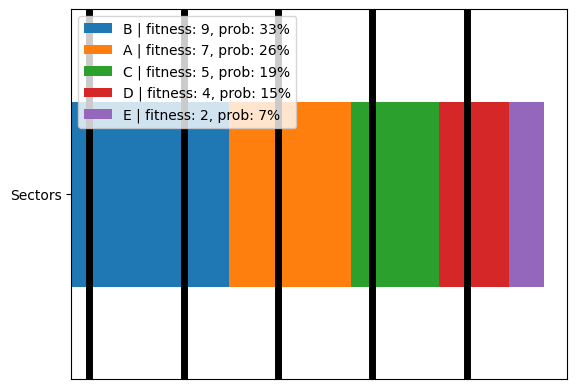

In [14]:
import random
import pandas as pd
import matplotlib.pyplot as plt

#from ch3.individual import Individual

POPULATION_SIZE = 5
random.seed(9)

unsorted_population = Individual.create_random_population(POPULATION_SIZE)
population = sorted(unsorted_population, key = lambda ind: ind.fitness, reverse = True)

fitness_sum = sum([ind.fitness for ind in population])
fitness_map = {}
for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'
    fitness_map[i_label] = i.fitness

index = ['Sectors']
df = pd.DataFrame(fitness_map, index = index)
df.plot.barh(stacked = True)
distance = fitness_sum / POPULATION_SIZE
shift = random.random() * distance
for i in range(POPULATION_SIZE):
    plt.axvline(x = shift + distance * i, linewidth = 5, color = 'black')
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.show()

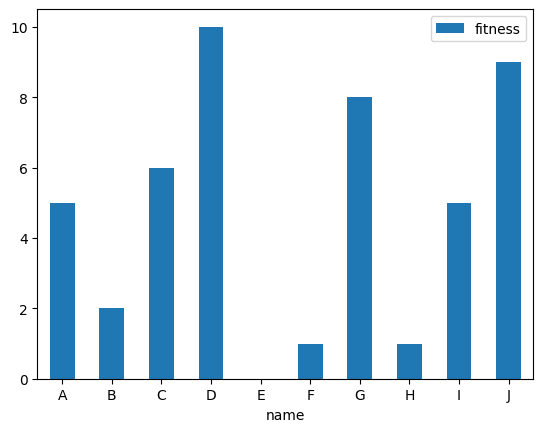

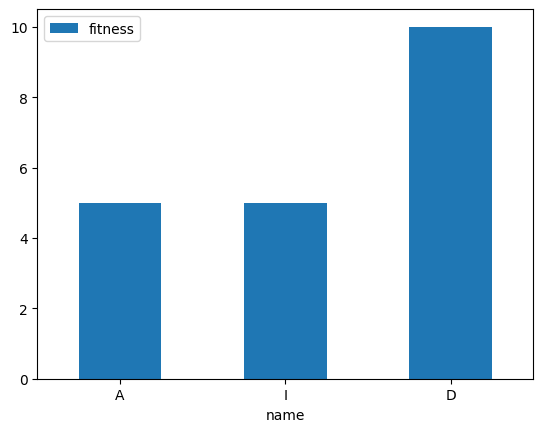

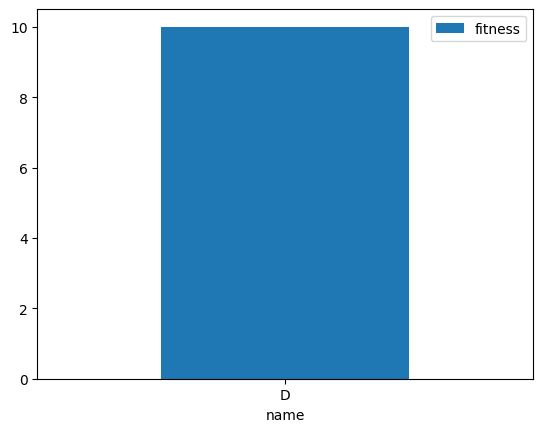

In [15]:
import random
import pandas as pd
import matplotlib.pyplot as plt

#from ch3.individual import Individual

POPULATION_SIZE = 10
TOURNAMENT_SIZE = 3

random.seed(7)

population = Individual.create_random_population(POPULATION_SIZE)
candidates = [random.choice(population) for _ in range(TOURNAMENT_SIZE)]
best = [max(candidates, key = lambda ind: ind.fitness)]


def plot_individuals(individual_set):
    df = pd.DataFrame({
        'name':    [ind.name for ind in individual_set],
        'fitness': [ind.fitness for ind in individual_set]
    })
    df.plot.bar(x = 'name', y = 'fitness', rot = 0)
    plt.show()


plot_individuals(population)
plot_individuals(candidates)
plot_individuals(best)